# Figures for the report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analyzing training and test error of ResNet-20 and ResNet38 as well as their plain counterparts

In [3]:
out_per_class_resnet = pd.read_csv("../results/resnet38_results_test_per_class.csv")
out_per_class_plain = pd.read_csv("../results/plain38_results_test_per_class.csv")
training_out_resnet = pd.read_csv("../results/resnet38_training_out.csv")
training_out_plain = pd.read_csv("../results/plain38_training_out.csv")

out_per_class_resnet20 = pd.read_csv("../results/resnet20_results_test_per_class.csv")
out_per_class_plain20 = pd.read_csv("../results/plain20_results_test_per_class.csv")
training_out_resnet20 = pd.read_csv("../results/resnet20_training_out.csv")
training_out_plain20 = pd.read_csv("../results/plain20_training_out.csv")

training_out_resnet20pre = pd.read_csv("../results/resnet20pre_training_out.csv")
out_per_class_resnet20pre = pd.read_csv("../results/resnet20pre_results_test_per_class.csv")

training_out_plain["Model"] = "Plain-38"
training_out_resnet["Model"] = "ResNet-38"
training_out_plain20["Model"] = "Plain-20"
training_out_resnet20["Model"] = "ResNet-20"
training_out_resnet20pre["Model"] = "ResNet-20pre"
all_errors = pd.concat([
    training_out_plain[["Model", "epoch", "train_loss", "train_accuracy", "val_accuracy", "val_loss", "epoch_time"]],
    training_out_plain20[["Model", "epoch", "train_loss", "train_accuracy", "val_accuracy", "val_loss", "epoch_time"]],
    training_out_resnet[["Model", "epoch", "train_loss", "train_accuracy", "val_accuracy", "val_loss", "epoch_time"]],
    training_out_resnet20[["Model", "epoch", "train_loss", "train_accuracy", "val_accuracy", "val_loss", "epoch_time"]],
    training_out_resnet20pre[["Model", "epoch", "train_loss", "train_accuracy", "val_accuracy", "val_loss", "epoch_time"]],
], axis=0)

def get_training_error(training_out, idx=-1):
    return (1 - training_out.iloc[idx]["train_accuracy"]) * 100


def get_test_error(out_per_class):
    return (1 - out_per_class[out_per_class.classes == "all"]["accuracy"].iloc[0]) * 100


errors = pd.DataFrame({
    "Models": ["Plain-38", "ResNet-38", "Plain-20", "ResNet-20", "ResNet-20pre"],
    "Train error": [get_training_error(training_out_plain), get_training_error(training_out_resnet),
                    get_training_error(training_out_plain20), get_training_error(training_out_resnet20),
                    get_training_error(training_out_resnet20pre)],
    "Test error": [get_test_error(out_per_class_plain), get_test_error(out_per_class_resnet),
                   get_test_error(out_per_class_plain20), get_test_error(out_per_class_resnet20),
                   get_test_error(out_per_class_resnet20pre)],
})

         Models  Train error  Test error
0      Plain-38        24.64       24.91
1     ResNet-38         9.80       12.90
2      Plain-20        10.48       13.62
3     ResNet-20         9.35       13.03
4  ResNet-20pre        12.49       14.80
              epoch_time
Model                   
Plain-20            30.0
Plain-38            40.0
ResNet-20           30.0
ResNet-20pre        31.0
ResNet-38           41.0


## Errors

In [ ]:
print(errors.round(2))
print((all_errors.groupby("Model").agg({"epoch_time": "sum"})/ 60).round())

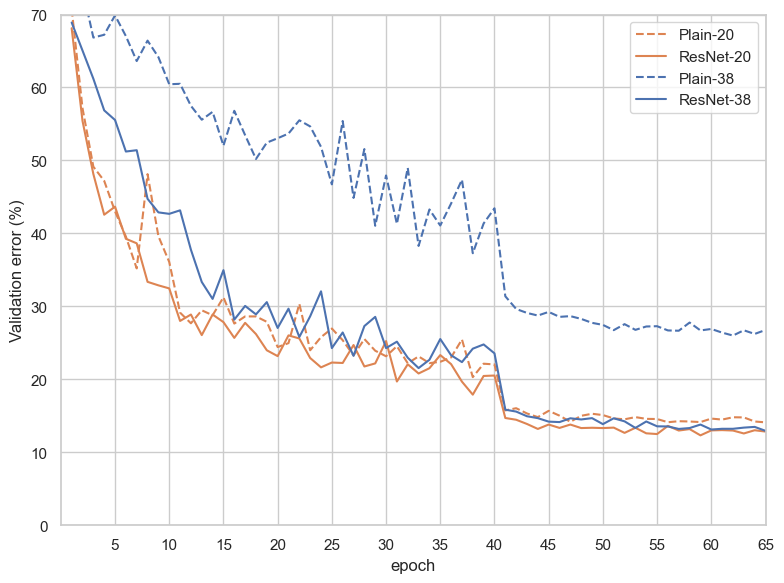

In [5]:
# plt.style.use("seaborn-v0_8-talk")
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
training_out_resnet["val_error"] = (1 - training_out_resnet["val_accuracy"]) * 100
training_out_plain["val_error"] = (1 - training_out_plain["val_accuracy"]) * 100
training_out_resnet20["val_error"] = (1 - training_out_resnet20["val_accuracy"]) * 100
training_out_plain20["val_error"] = (1 - training_out_plain20["val_accuracy"]) * 100

sns.lineplot(data=training_out_plain20, x='epoch', y='val_error', ax=ax, label="Plain-20", color=sns.color_palette()[1],
             linestyle="--")
sns.lineplot(data=training_out_resnet20, x='epoch', y='val_error', ax=ax, label="ResNet-20",
             color=sns.color_palette()[1])

sns.lineplot(data=training_out_plain, x='epoch', y='val_error', ax=ax, label="Plain-38", linestyle="--",
             color=sns.color_palette()[0])
sns.lineplot(data=training_out_resnet, x='epoch', y='val_error', ax=ax, label="ResNet-38", color=sns.color_palette()[0])

max_epo = training_out_resnet["epoch"].max()
ax.set_ylabel("Validation error (%)")
ax.set_xlim(0, max_epo)
ax.set_ylim(0, 70)
ax.set_xticks(range(5, max_epo + 1, 5 if max_epo > 15 else 1))
fig.tight_layout()
fig.savefig("../results/training_error_resnet_vs_plain_net.png")
fig.savefig("../results/training_error_resnet_vs_plain_net.pdf")
plt.show()

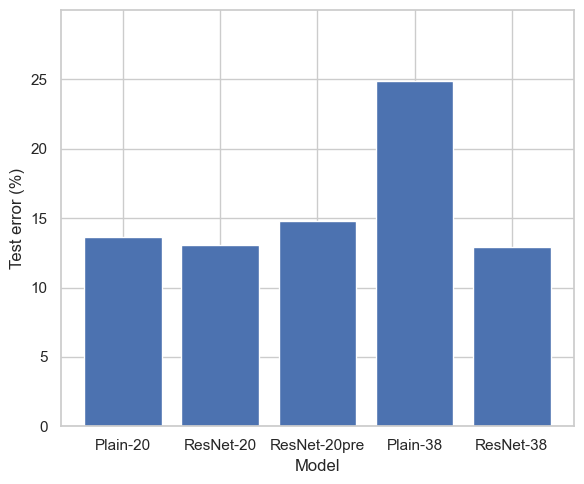

In [6]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# ax.bar(errors["Models"], errors["Train error"], label="Train error")
errors.index = errors["Models"]
ordered_errors = errors.reindex(["Plain-20", "ResNet-20", "ResNet-20pre", "Plain-38", "ResNet-38"])
ax.bar(ordered_errors["Models"], ordered_errors["Test error"])
ax.set_ylabel('Test error (%)')
ax.set_xlabel('Model')
ax.set_ylim(0, 30)
ax.set_yticks(range(0, 30, 5))
fig.tight_layout()
plt.show()
fig.savefig("../results/test_error_all_models.pdf")

## Overfitting

To assess overfitting, we calculate the difference between the training and test error and divide it by the test error. The greater the absolute value, the greater the overfitting of the models. 

On overall, the ResNet models have a slight bigger overfit than the plain models (that is combined to a better test error above). The Plain-38 is a different case, as its test error is really higher, meaning is does not overfit, but perform poorly on both the training and the test sets.

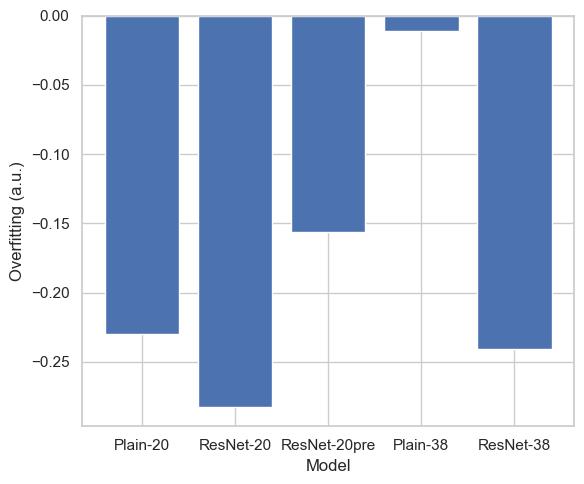

In [8]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# ax.bar(errors["Models"], errors["Train error"], label="Train error")
errors.index = errors["Models"]
ordered_errors = errors.reindex(["Plain-20", "ResNet-20", "ResNet-20pre", "Plain-38", "ResNet-38"])
ax.bar(ordered_errors["Models"],
       (ordered_errors["Train error"] - ordered_errors["Test error"]) / ordered_errors["Test error"])
ax.set_ylabel('Overfitting (a.u.)')
ax.set_xlabel('Model')
# ax.set_ylim(-45, 0)
# ax.set_yticks(range(0, 30, 5))
fig.tight_layout()
plt.show()
fig.savefig("../results/overfitting.pdf")

In [10]:
all_errors["Gap"] = ((1 - all_errors["val_accuracy"]) - (1 - all_errors["train_accuracy"])) * all_errors.epoch

overfit = all_errors.groupby("Model").agg({"Gap": "sum"})
overfit

,Gap
Model,
Plain-20,73.669133
Plain-38,54.485200
ResNet-20,69.369000
ResNet-20pre,59.829978
ResNet-38,69.019933


## Other plots

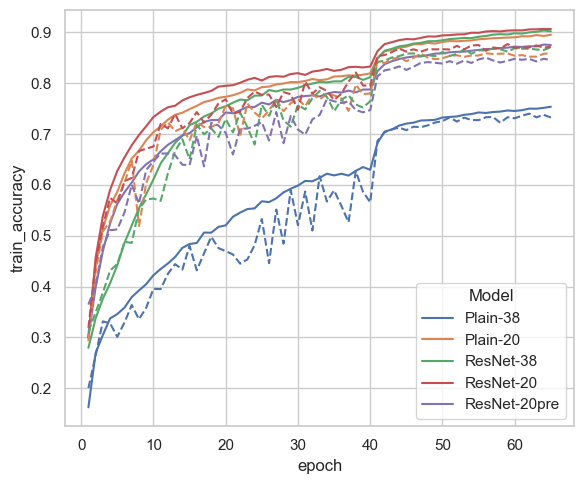

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.lineplot(data=all_errors, x='epoch', y='train_accuracy', hue='Model', ax=ax)
sns.lineplot(data=all_errors, x='epoch', y='val_accuracy', hue='Model', ax=ax, linestyle="--", legend=None)
fig.tight_layout()
plt.show()